In [45]:
from zipfile import ZipFile
import pandas as pd
import os 
import torch
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Sequential, layers
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/IML_TASK4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
curr_dir = os.getcwd()
curr_dir

'/content/drive/MyDrive/Colab Notebooks/IML_TASK4'

In [4]:
z = ZipFile(curr_dir + '/pretrain_features.csv.zip')
f = z.open('pretrain_features.csv')
pretrain_features_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/pretrain_labels.csv.zip')
f = z.open('pretrain_labels.csv')
pretrain_labels_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/train_features.csv.zip')
f = z.open('train_features.csv')
train_features_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/train_labels.csv.zip')
f = z.open('train_labels.csv')
train_labels_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/test_features.csv.zip')
f = z.open('test_features.csv')
test_features_ori = pd.read_csv(f)
f.close()
z.close()

In [5]:
#pretrain molecule features
pretrain_features_ori.head(3)

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,0,c1occ2c1c1ccc3cscc3c1c1ncc3cc(ccc3c21)-c1cccc2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,C1C=c2c(cc3ncc4c5[SiH2]C=Cc5oc4c3c2=C1)-c1scc2...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,C1C=c2c3cccnc3c3c4c[nH]cc4c4cc(cnc4c3c2=C1)-c1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# pretrain molecule labels
pretrain_labels_ori.head(3)

,Id,lumo_energy
0,0,-3.111521
1,1,-3.219118
2,2,-3.114145


In [7]:
# training features
train_features_ori.head(3)

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,50000,C1C=c2c3ccoc3c3c4ccccc4c(cc3c2=C1)-c1scc2ccsc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50001,c1cc([se]c1-c1sc(-c2cccc3nsnc23)c2nccnc12)-c1c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50002,[SiH2]1C=CC=C1c1cc2cnc3c(sc4ccc5c[nH]cc5c34)c2...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# training labels
train_labels_ori.head(3)

,Id,homo_lumo_gap
0,50000,2.052872
1,50001,1.325530
2,50002,1.837294


In [9]:
# test features 
test_features_ori.head(3)

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,50100,c1cc2c(scc2[nH]1)-c1ccc(cn1)-c1sc(-c2scc3occc2...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50101,[SiH2]1C=Cc2ncc3c4oc(cc4c4cocc4c3c12)-c1ccc[se]1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50102,C1C=c2c3c(oc4cc(C5=CC=CC5)c5nsnc5c34)c3ccccc3c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pretrain_features = pretrain_features_ori.iloc[:, 2:]
pretrain_labels = pretrain_labels_ori.iloc[:, 1:]
train_features = train_features_ori.iloc[:, 2:]
train_labels = train_labels_ori.iloc[:, 1:]
test_features = test_features_ori.iloc[:, 2:]

# to numpy 
pretrain_features.to_numpy()
train_features.to_numpy()
train_labels.to_numpy()
test_features.to_numpy()

In [12]:
n_inputs = pretrain_features.shape[1]
input_data = Input(shape=(1000, ))
encoded = Dense(units=784, activation='relu')(input_data)
encdoed = Dense(units=128, activation='relu')(encoded)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='relu')(decoded)
decoded = Dense(units=1000, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded) # we extract the encoded model
autoencoder.compile(loss='mse',optimizer='adam')

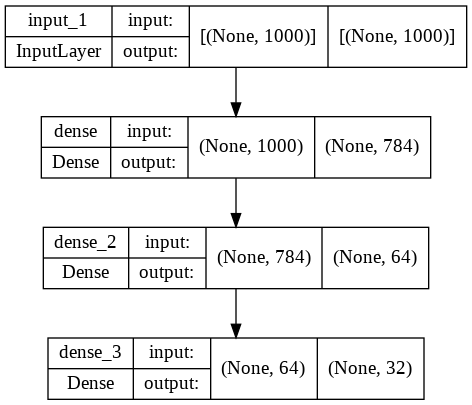

In [13]:
plot_model(encoder, 'encoder.png', show_shapes=True)

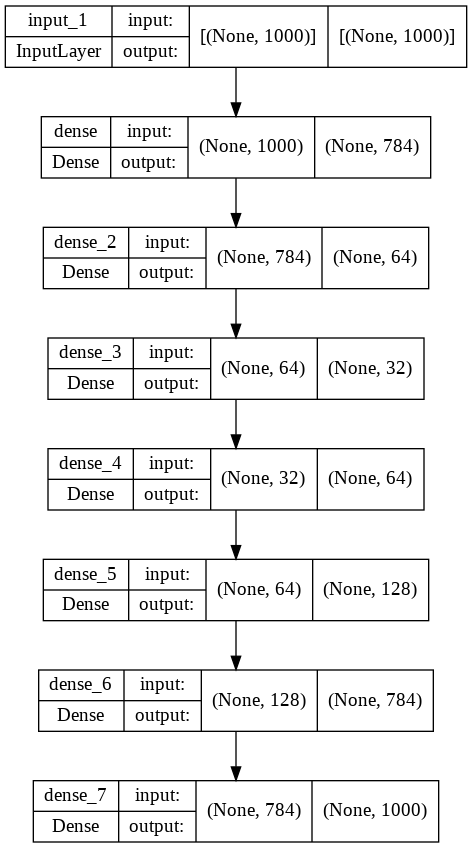

In [14]:
plot_model(autoencoder, 'autoencoder.png', show_shapes=True)

In [ ]:
num_epochs = 50
batch_size = 120
train_batch_size = 60

In [15]:
history = autoencoder.fit(x=pretrain_features, y=pretrain_features, epochs= num_epochs, batch_size=batch_size, verbose=2, initial_epoch=0, workers=4)

Epoch 1/20
417/417 - 15s - loss: 0.0382 - 15s/epoch - 36ms/step
Epoch 2/20
417/417 - 15s - loss: 0.0253 - 15s/epoch - 36ms/step
Epoch 3/20
417/417 - 14s - loss: 0.0155 - 14s/epoch - 33ms/step
Epoch 4/20
417/417 - 14s - loss: 0.0114 - 14s/epoch - 33ms/step
Epoch 5/20
417/417 - 14s - loss: 0.0096 - 14s/epoch - 33ms/step
Epoch 6/20
417/417 - 14s - loss: 0.0086 - 14s/epoch - 33ms/step
Epoch 7/20
417/417 - 21s - loss: 0.0078 - 21s/epoch - 51ms/step
Epoch 8/20
417/417 - 23s - loss: 0.0073 - 23s/epoch - 55ms/step
Epoch 9/20
417/417 - 14s - loss: 0.0068 - 14s/epoch - 33ms/step
Epoch 10/20
417/417 - 14s - loss: 0.0064 - 14s/epoch - 34ms/step
Epoch 11/20
417/417 - 14s - loss: 0.0061 - 14s/epoch - 34ms/step
Epoch 12/20
417/417 - 14s - loss: 0.0059 - 14s/epoch - 33ms/step
Epoch 13/20
417/417 - 14s - loss: 0.0056 - 14s/epoch - 33ms/step
Epoch 14/20
417/417 - 14s - loss: 0.0055 - 14s/epoch - 34ms/step
Epoch 15/20
417/417 - 14s - loss: 0.0053 - 14s/epoch - 33ms/step
Epoch 16/20
417/417 - 14s - loss: 

In [16]:
# transform pretrain features 
pretrain_ft_encoded = encoder.predict(pretrain_features)
pretrain_ft_encoded.shape

(50000, 32)

In [27]:
# Model for predicting the lumo energy 
def get_nn(num_in, num_out):
    NN = Sequential()
    NN.add(Dense(32, input_dim=num_in, kernel_initializer='he_uniform', activation='relu'))
    NN.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
    NN.add(Dense(num_out))
    NN.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
    return NN

# calculate prediction error on lumo energy 
def RMSE(true, pred):
  squared_err = np.square(true-pred)
  sum_err = np.sum(squared_err)
  rmse_err = np.sqrt(sum_err / true.size)
  return rmse_err

In [ ]:
##### Pretraining starting here #####

In [31]:
# split pretrain and pre_validation sets 
X_pre_train_enc, X_pre_val_enc, y_pre_train, y_pre_val = train_test_split(pretrain_ft_encoded, pretrain_labels, test_size=0.2, random_state=1)

# train on the encoded features 
num_in = X_pre_train_enc.shape[1]
model = get_nn(num_in, num_out=1) 
model.fit(X_pre_train_enc, y_pre_train, epochs=20, batch_size=120)

# # predict on the validation set 
y_pre_pred = model.predict(X_pre_val_enc)
pretrain_error = RMSE(y_pre_val, y_pre_pred)
print("Pretrain error on validation set is: ", pretrain_error) 

Epoch 1/20
334/334 [==============================] - 2s 5ms/step - loss: 0.9781 - mean_squared_error: 0.9781
Epoch 2/20
334/334 [==============================] - 1s 2ms/step - loss: 0.1890 - mean_squared_error: 0.1890
Epoch 3/20
334/334 [==============================] - 1s 2ms/step - loss: 0.1291 - mean_squared_error: 0.1291
Epoch 4/20
334/334 [==============================] - 1s 2ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 5/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 6/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0779 - mean_squared_error: 0.0779
Epoch 7/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 8/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0619 - mean_squared_error: 0.0619
Epoch 9/20
334/334 [==============================] - 1s 2ms/step - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 10/2

In [ ]:
##### start processing the actual training features #####

In [33]:
# encoding features using autoencoder 
train_ft_encoded = encoder.predict(train_features)
test_ft_encoded = encoder.predict(test_features)

In [42]:
# split train and validation sets 
X_train_enc, X_val_enc, y_train, y_val = train_test_split(train_ft_encoded, train_labels, test_size=0.2, random_state=1)

# train on the small dataset 
num_in_gap = X_train_enc.shape[1]
model_gap = get_nn(num_in_gap, num_out=1) 
model_gap.fit(X_train_enc, y_train, epochs=num_epochs, batch_size=train_batch_size)

# predict on validation set 
y_val_pred = model_gap.predict(X_val_enc)
train_error = RMSE(y_val, y_val_pred)
print("training error on validation set is: ", train_error)

y_pred = model_gap.predict(test_ft_encoded)

Epoch 1/20
2/2 [==============================] - 1s 9ms/step - loss: 2439.0601 - mean_squared_error: 2439.0601
Epoch 2/20
2/2 [==============================] - 0s 9ms/step - loss: 1857.3031 - mean_squared_error: 1857.3031
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 1372.0742 - mean_squared_error: 1372.0743
Epoch 4/20
2/2 [==============================] - 0s 9ms/step - loss: 953.4118 - mean_squared_error: 953.4118
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 639.8835 - mean_squared_error: 639.8835
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 391.0187 - mean_squared_error: 391.0187
Epoch 7/20
2/2 [==============================] - 0s 9ms/step - loss: 227.9722 - mean_squared_error: 227.9722
Epoch 8/20
2/2 [==============================] - 0s 9ms/step - loss: 119.1398 - mean_squared_error: 119.1398
Epoch 9/20
2/2 [==============================] - 0s 16ms/step - loss: 67.7168 - mean_squared_error: 67.7168
Epoc

In [70]:
header = ['Id', 'y']
IDs = np.array(test_features_ori.iloc[:, 0]).reshape(10000, 1)
predictions = np.concatenate((IDs, y_pred), axis=1)
with open("./results.csv", 'w', newline='',encoding='UTF8') as f:
      writer = csv.DictWriter(f, delimiter=',', fieldnames=header)
      writer.writeheader()
      
      new_writer = csv.writer(f, delimiter=',')
      for i in predictions:
        new_writer.writerow(['{:.3f}'.format(x) for x in i])